# Capstone Project Notebook
- California State University - Fullerton (CSUF)
- Bernardo Bouzan
- Dataset: 
https://www.kaggle.com/datasets/muniryadi/gasturbine-co-and-nox-emission-data
- GitHub: https://github.com/bbouzan/capstone-csuf

# Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("gt_full.csv")

# Exploratory Data Analysis

## First Look

In [3]:
df

,ID,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...,...
36728,36729,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,36730,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,36731,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,36732,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


#### Conclusion
- There are 36733 samples
- Variables are:
    - Index of data point (ID)
    - Ambient temperature (AT) C
    - Ambient pressure (AP) mbar
    - Ambient humidity (AH) (%)
    - Air filter difference pressure (AFDP) mbar
    - Gas turbine exhaust pressure (GTEP) mbar
    - Turbine inlet temperature (TIT) C
    - Turbine after temperature (TAT) C
    - Compressor discharge pressure (CDP) mbar
    - Turbine energy yield (TEY) MWH
    - Carbon monoxide (CO) mg/m3
    - Nitrogen oxides (NOx) mg/m3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      36733 non-null  int64  
 1   AT      36733 non-null  float64
 2   AP      36733 non-null  float64
 3   AH      36733 non-null  float64
 4   AFDP    36733 non-null  float64
 5   GTEP    36733 non-null  float64
 6   TIT     36733 non-null  float64
 7   TAT     36733 non-null  float64
 8   TEY     36733 non-null  float64
 9   CDP     36733 non-null  float64
 10  CO      36733 non-null  float64
 11  NOX     36733 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


#### Conclusion:
- As common for engineering problems, dataset is composed of floating-point numbers.
- The dataset has been properly generated, meaning that there are no NULL points.

In [5]:
df.describe()

,ID,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,18367.000000,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,10604.048056,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,1.000000,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,9184.000000,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,18367.000000,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,27550.000000,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,36733.000000,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


#### Conclusion:
- Standard deviation on all columns is an order of magnitude smaller than the mean.
- Occurence of out of band outliers seems small.

### Creation of Column Groups

In [6]:
df.columns

Index(['ID', 'AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP',
       'CO', 'NOX'],
      dtype='object')

In [7]:
features = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']

In [8]:
amb_features = ['AT', 'AP', 'AH']

In [9]:
proc_features = ['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP']

### Creation of Key Emission Indicator Column
- Idea is to use this KPI as a target value to minimize during operation.
- As seen on the description table above, CO concentration is way lower than NOX. To even out the importance of both, in this KPI the CO concentration will be multiplied by 10.

In [10]:
df['KEI'] = (df['CO']*10) + df['NOX']

## Distribution Analysis

### Index of data point (ID)

array([[<AxesSubplot:title={'center':'ID'}>]], dtype=object)

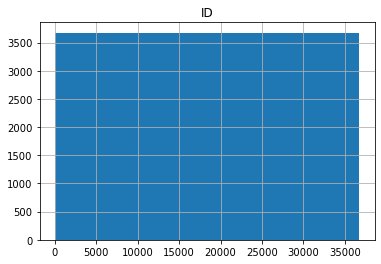

In [11]:
df.hist(["ID"])

In [12]:
df["ID"].describe()

count    36733.000000
mean     18367.000000
std      10604.048056
min          1.000000
25%       9184.000000
50%      18367.000000
75%      27550.000000
max      36733.000000
Name: ID, dtype: float64

#### Conclusion:
- Just a counter, so an even distribution is expected

### Ambient temperature (AT)

array([[<AxesSubplot:title={'center':'AT'}>]], dtype=object)

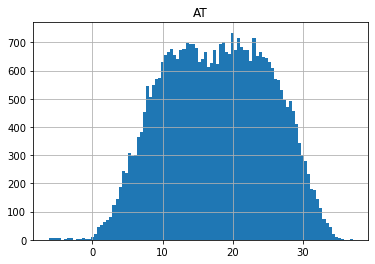

In [13]:
df.hist(["AT"], bins=100)

In [14]:
df["AT"].describe()

count    36733.000000
mean        17.712726
std          7.447451
min         -6.234800
25%         11.781000
50%         17.801000
75%         23.665000
max         37.103000
Name: AT, dtype: float64

#### Conclusion:
- Weather temperature seems to be fair, mostly around 10 and 25 degree Celsius.
- Data seems mostly evenly distributed.
- Few datapoints on negative temperature range look like outliers.

#### Removing Outliers

In [15]:
dfMain = df

array([[<AxesSubplot:title={'center':'AT'}>]], dtype=object)

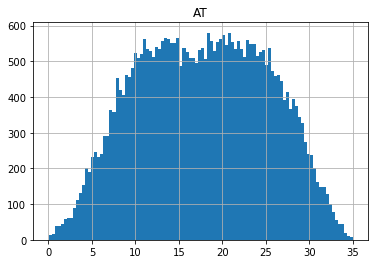

In [16]:
dfMain = dfMain[(0 < dfMain["AT"]) & (dfMain["AT"] < 35)]
dfMain.hist(["AT"], bins=100)

### Ambient pressure (AP)

array([[<AxesSubplot:title={'center':'AP'}>]], dtype=object)

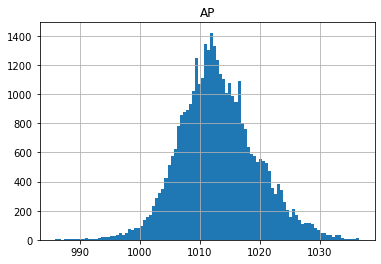

In [17]:
df.hist(["AP"], bins=100)

In [18]:
df["AP"].describe()

count    36733.000000
mean      1013.070165
std          6.463346
min        985.850000
25%       1008.800000
50%       1012.600000
75%       1017.000000
max       1036.600000
Name: AP, dtype: float64

#### Conclusion:
- Ambient pressure seems to be fairly evenly distributed on the dataset.
- Few outliers on the lower end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'AP'}>]], dtype=object)

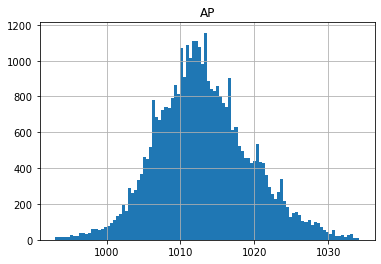

In [19]:
dfMain = dfMain[(993 < dfMain["AP"]) & (dfMain["AP"] < 1035)]
dfMain.hist(["AP"], bins=100)

### Ambient humidity (AH)

array([[<AxesSubplot:title={'center':'AH'}>]], dtype=object)

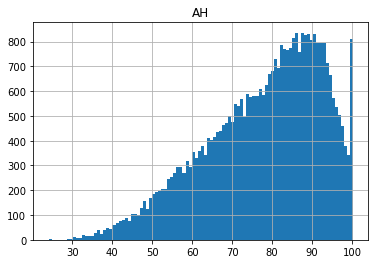

In [20]:
df.hist(["AH"], bins=100)

In [21]:
df["AH"].describe()

count    36733.000000
mean        77.867015
std         14.461355
min         24.085000
25%         68.188000
50%         80.470000
75%         89.376000
max        100.200000
Name: AH, dtype: float64

#### Conclusion:
- Test location is fairly humid.
- Range of data looks great, with data from 24% to 100% humidity.
- Few outliers on the lower end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'AH'}>]], dtype=object)

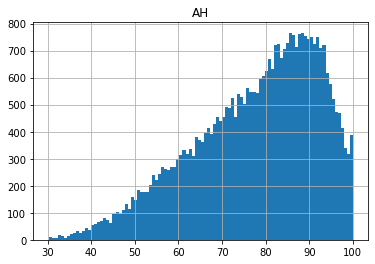

In [22]:
dfMain = dfMain[(30 < dfMain["AH"]) & (dfMain["AH"] < 100)]
dfMain.hist(["AH"], bins=100)

### Air filter difference pressure (AFDP)

array([[<AxesSubplot:title={'center':'AFDP'}>]], dtype=object)

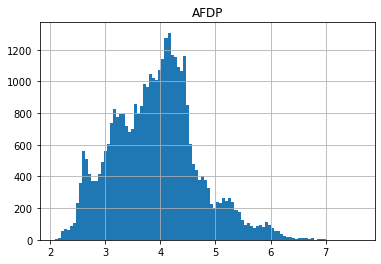

In [23]:
df.hist(["AFDP"], bins=100)

In [24]:
df["AFDP"].describe()

count    36733.000000
mean         3.925518
std          0.773936
min          2.087400
25%          3.355600
50%          3.937700
75%          4.376900
max          7.610600
Name: AFDP, dtype: float64

#### Conclusion:
- Process variable, not straight-forward to interpret.
- Range seems well-defined.
- Few outliers on the upper end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'AFDP'}>]], dtype=object)

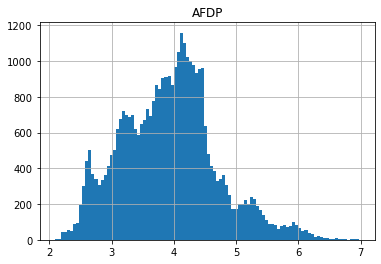

In [25]:
dfMain = dfMain[(2 < dfMain["AFDP"]) & (dfMain["AFDP"] < 7)]
dfMain.hist(["AFDP"], bins=100)

### Gas turbine exhaust pressure (GTEP)

array([[<AxesSubplot:title={'center':'GTEP'}>]], dtype=object)

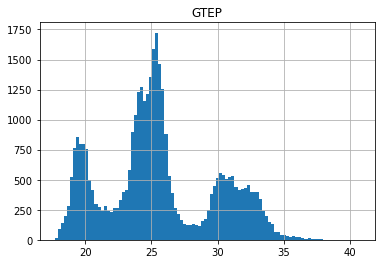

In [26]:
df.hist(["GTEP"], bins=100)

In [27]:
df["GTEP"].describe()

count    36733.000000
mean        25.563801
std          4.195957
min         17.698000
25%         23.129000
50%         25.104000
75%         29.061000
max         40.716000
Name: GTEP, dtype: float64

#### Conclusion:
- Three main concentration points around 19, 25 and 32 mbar.
- Possible candidate to be broken into labels (low, medium, high).
- May suggest the turbine has been operated in three main speeds.
- Few outliers on the upper end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'GTEP'}>]], dtype=object)

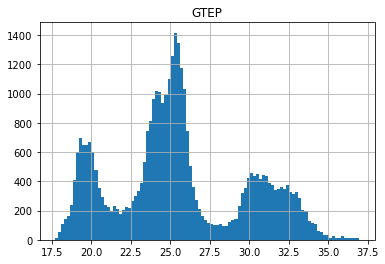

In [28]:
dfMain = dfMain[(17 < dfMain["GTEP"]) & (dfMain["GTEP"] < 37)]
dfMain.hist(["GTEP"], bins=100)

### Turbine inlet temperature (TIT)

array([[<AxesSubplot:title={'center':'TIT'}>]], dtype=object)

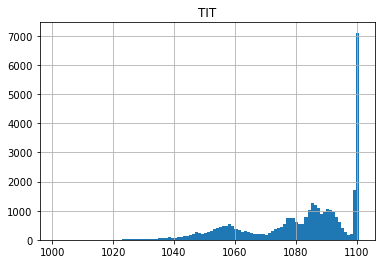

In [29]:
df.hist(["TIT"], bins=100)

In [30]:
df["TIT"].describe()

count    36733.000000
mean      1081.428084
std         17.536373
min       1000.800000
25%       1071.800000
50%       1085.900000
75%       1097.000000
max       1100.900000
Name: TIT, dtype: float64

#### Conclusion:
- Data seems highly concentrated on the value 1100 degC.
- Suggests a main operation steady-state.
- Outliers on the lower end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'TIT'}>]], dtype=object)

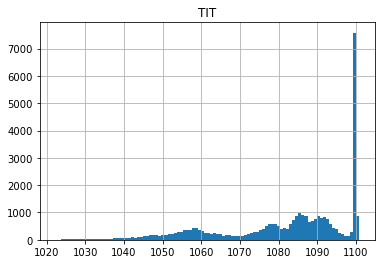

In [31]:
dfMain = dfMain[(1022 < dfMain["TIT"]) & (dfMain["TIT"] < 1102)]
dfMain.hist(["TIT"], bins=100)

### Turbine after temperature (TAT)

array([[<AxesSubplot:title={'center':'TAT'}>]], dtype=object)

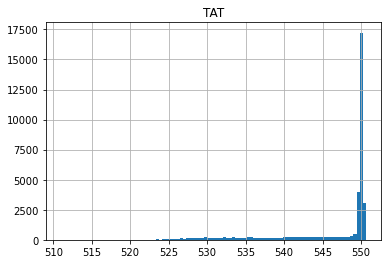

In [32]:
df.hist(["TAT"], bins=100)

In [33]:
df["TAT"].describe()

count    36733.000000
mean       546.158517
std          6.842360
min        511.040000
25%        544.720000
50%        549.880000
75%        550.040000
max        550.610000
Name: TAT, dtype: float64

#### Conclusion:
- Very concentrated at 550 degC.
- May not be ideal to be used as a feature due to low variability.
- Outliers on the lower end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'TAT'}>]], dtype=object)

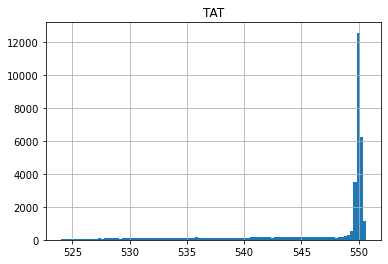

In [34]:
dfMain = dfMain[(524 < dfMain["TAT"]) & (dfMain["TAT"] < 552)]
dfMain.hist(["TAT"], bins=100)

### Compressor discharge pressure (CDP)

array([[<AxesSubplot:title={'center':'CDP'}>]], dtype=object)

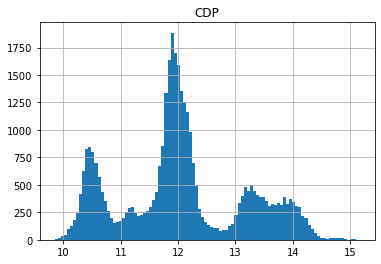

In [35]:
df.hist(["CDP"], bins=100)

In [36]:
df["CDP"].describe()

count    36733.000000
mean        12.060525
std          1.088795
min          9.851800
25%         11.435000
50%         11.965000
75%         12.855000
max         15.159000
Name: CDP, dtype: float64

#### Conclusion:
- Visualy is very correlated to GTEP, which makes sense once it's also a pressure reading located after the burner.
- Strong candidate for follow-up correlation analysis with GTEP.
- Three main concentration points around 10.5, 11.8 and 13.4 mbar.
- Few outliers on the upper end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'CDP'}>]], dtype=object)

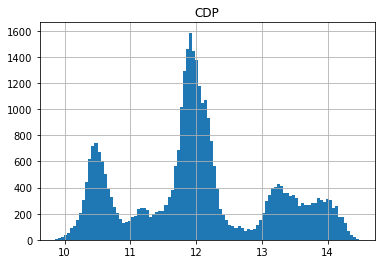

In [37]:
dfMain = dfMain[(9 < dfMain["CDP"]) & (dfMain["CDP"] < 16)]
dfMain.hist(["CDP"], bins=100)

### Turbine energy yield (TEY)

array([[<AxesSubplot:title={'center':'TEY'}>]], dtype=object)

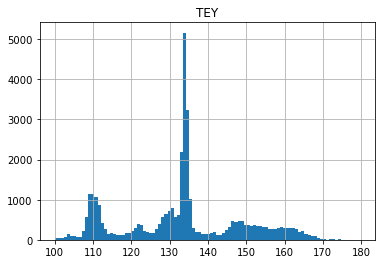

In [38]:
df.hist(["TEY"], bins=100)

In [39]:
df["TEY"].describe()

count    36733.000000
mean       133.506404
std         15.618634
min        100.020000
25%        124.450000
50%        133.730000
75%        144.080000
max        179.500000
Name: TEY, dtype: float64

#### Conclusion:
- It's clear the turbine operates most of the time producing 135 MWh.
- It suggests that such operational steady-state is what generates concentrated distributions for TIT, TAT.
- Central peak with two humps on each side is also similar profile as GTEP and CDP.
- Few outliers on the upper end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'TEY'}>]], dtype=object)

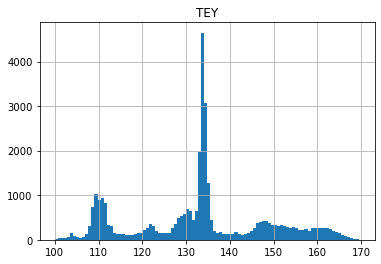

In [40]:
dfMain = dfMain[(100 < dfMain["TEY"]) & (dfMain["TEY"] < 175)]
dfMain.hist(["TEY"], bins=100)

### Carbon monoxide (CO)

array([[<AxesSubplot:title={'center':'CO'}>]], dtype=object)

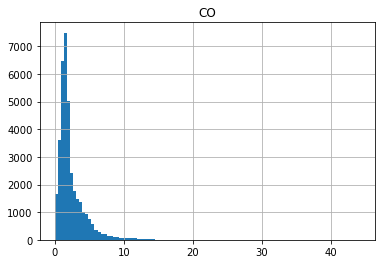

In [41]:
df.hist(["CO"], bins=100)

In [42]:
df["CO"].describe()

count    36733.000000
mean         2.372468
std          2.262672
min          0.000388
25%          1.182400
50%          1.713500
75%          2.842900
max         44.103000
Name: CO, dtype: float64

#### Conclusion:
- CO concentration is skewed, most of the time below 5%.
- Outliers on the upper end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'CO'}>]], dtype=object)

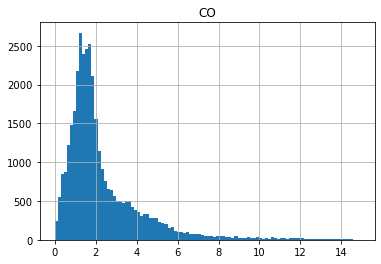

In [43]:
dfMain = dfMain[(0 < dfMain["CO"]) & (dfMain["CO"] < 15)]
dfMain.hist(["CO"], bins=100)

### Nitrogen oxides (NOX)

array([[<AxesSubplot:title={'center':'NOX'}>]], dtype=object)

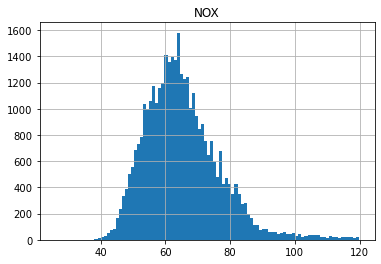

In [44]:
df.hist(["NOX"], bins=100)

In [45]:
df["NOX"].describe()

count    36733.000000
mean        65.293067
std         11.678357
min         25.905000
25%         57.162000
50%         63.849000
75%         71.548000
max        119.910000
Name: NOX, dtype: float64

#### Conclusion:
- NOX concentration is way more distributed than CO.
- Few outliers on the lower end.

#### Removing Outliers

array([[<AxesSubplot:title={'center':'NOX'}>]], dtype=object)

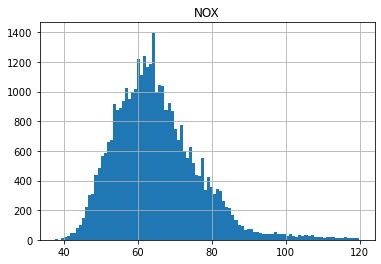

In [46]:
dfMain = dfMain[(37 < dfMain["NOX"]) & (dfMain["NOX"] < 120)]
dfMain.hist(["NOX"], bins=100)

### Key Emissions Indicator (KEI)

Text(0, 0.5, 'Occurrences')

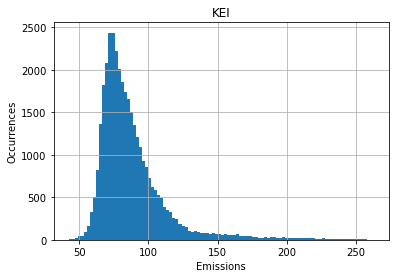

In [47]:
dfMain.hist(["KEI"], bins=100)
plt.xlabel('Emissions')
plt.ylabel('Occurrences')

In [48]:
dfMain["KEI"].describe()

count    35777.000000
mean        88.279286
std         25.677592
min         42.552230
25%         72.632000
50%         81.693000
75%         95.376000
max        262.470000
Name: KEI, dtype: float64

#### Conclusion:
- KEI clearly contains the skewness of CO distribution, along with the wider range of NOX distribution.
- Given the goal of KEI it seems well balanced to be used as target of the ML algorithm.
- Being a dependent variable, the outliers where already removed from CO and NOX.

## Correlation Analysis

### Overview

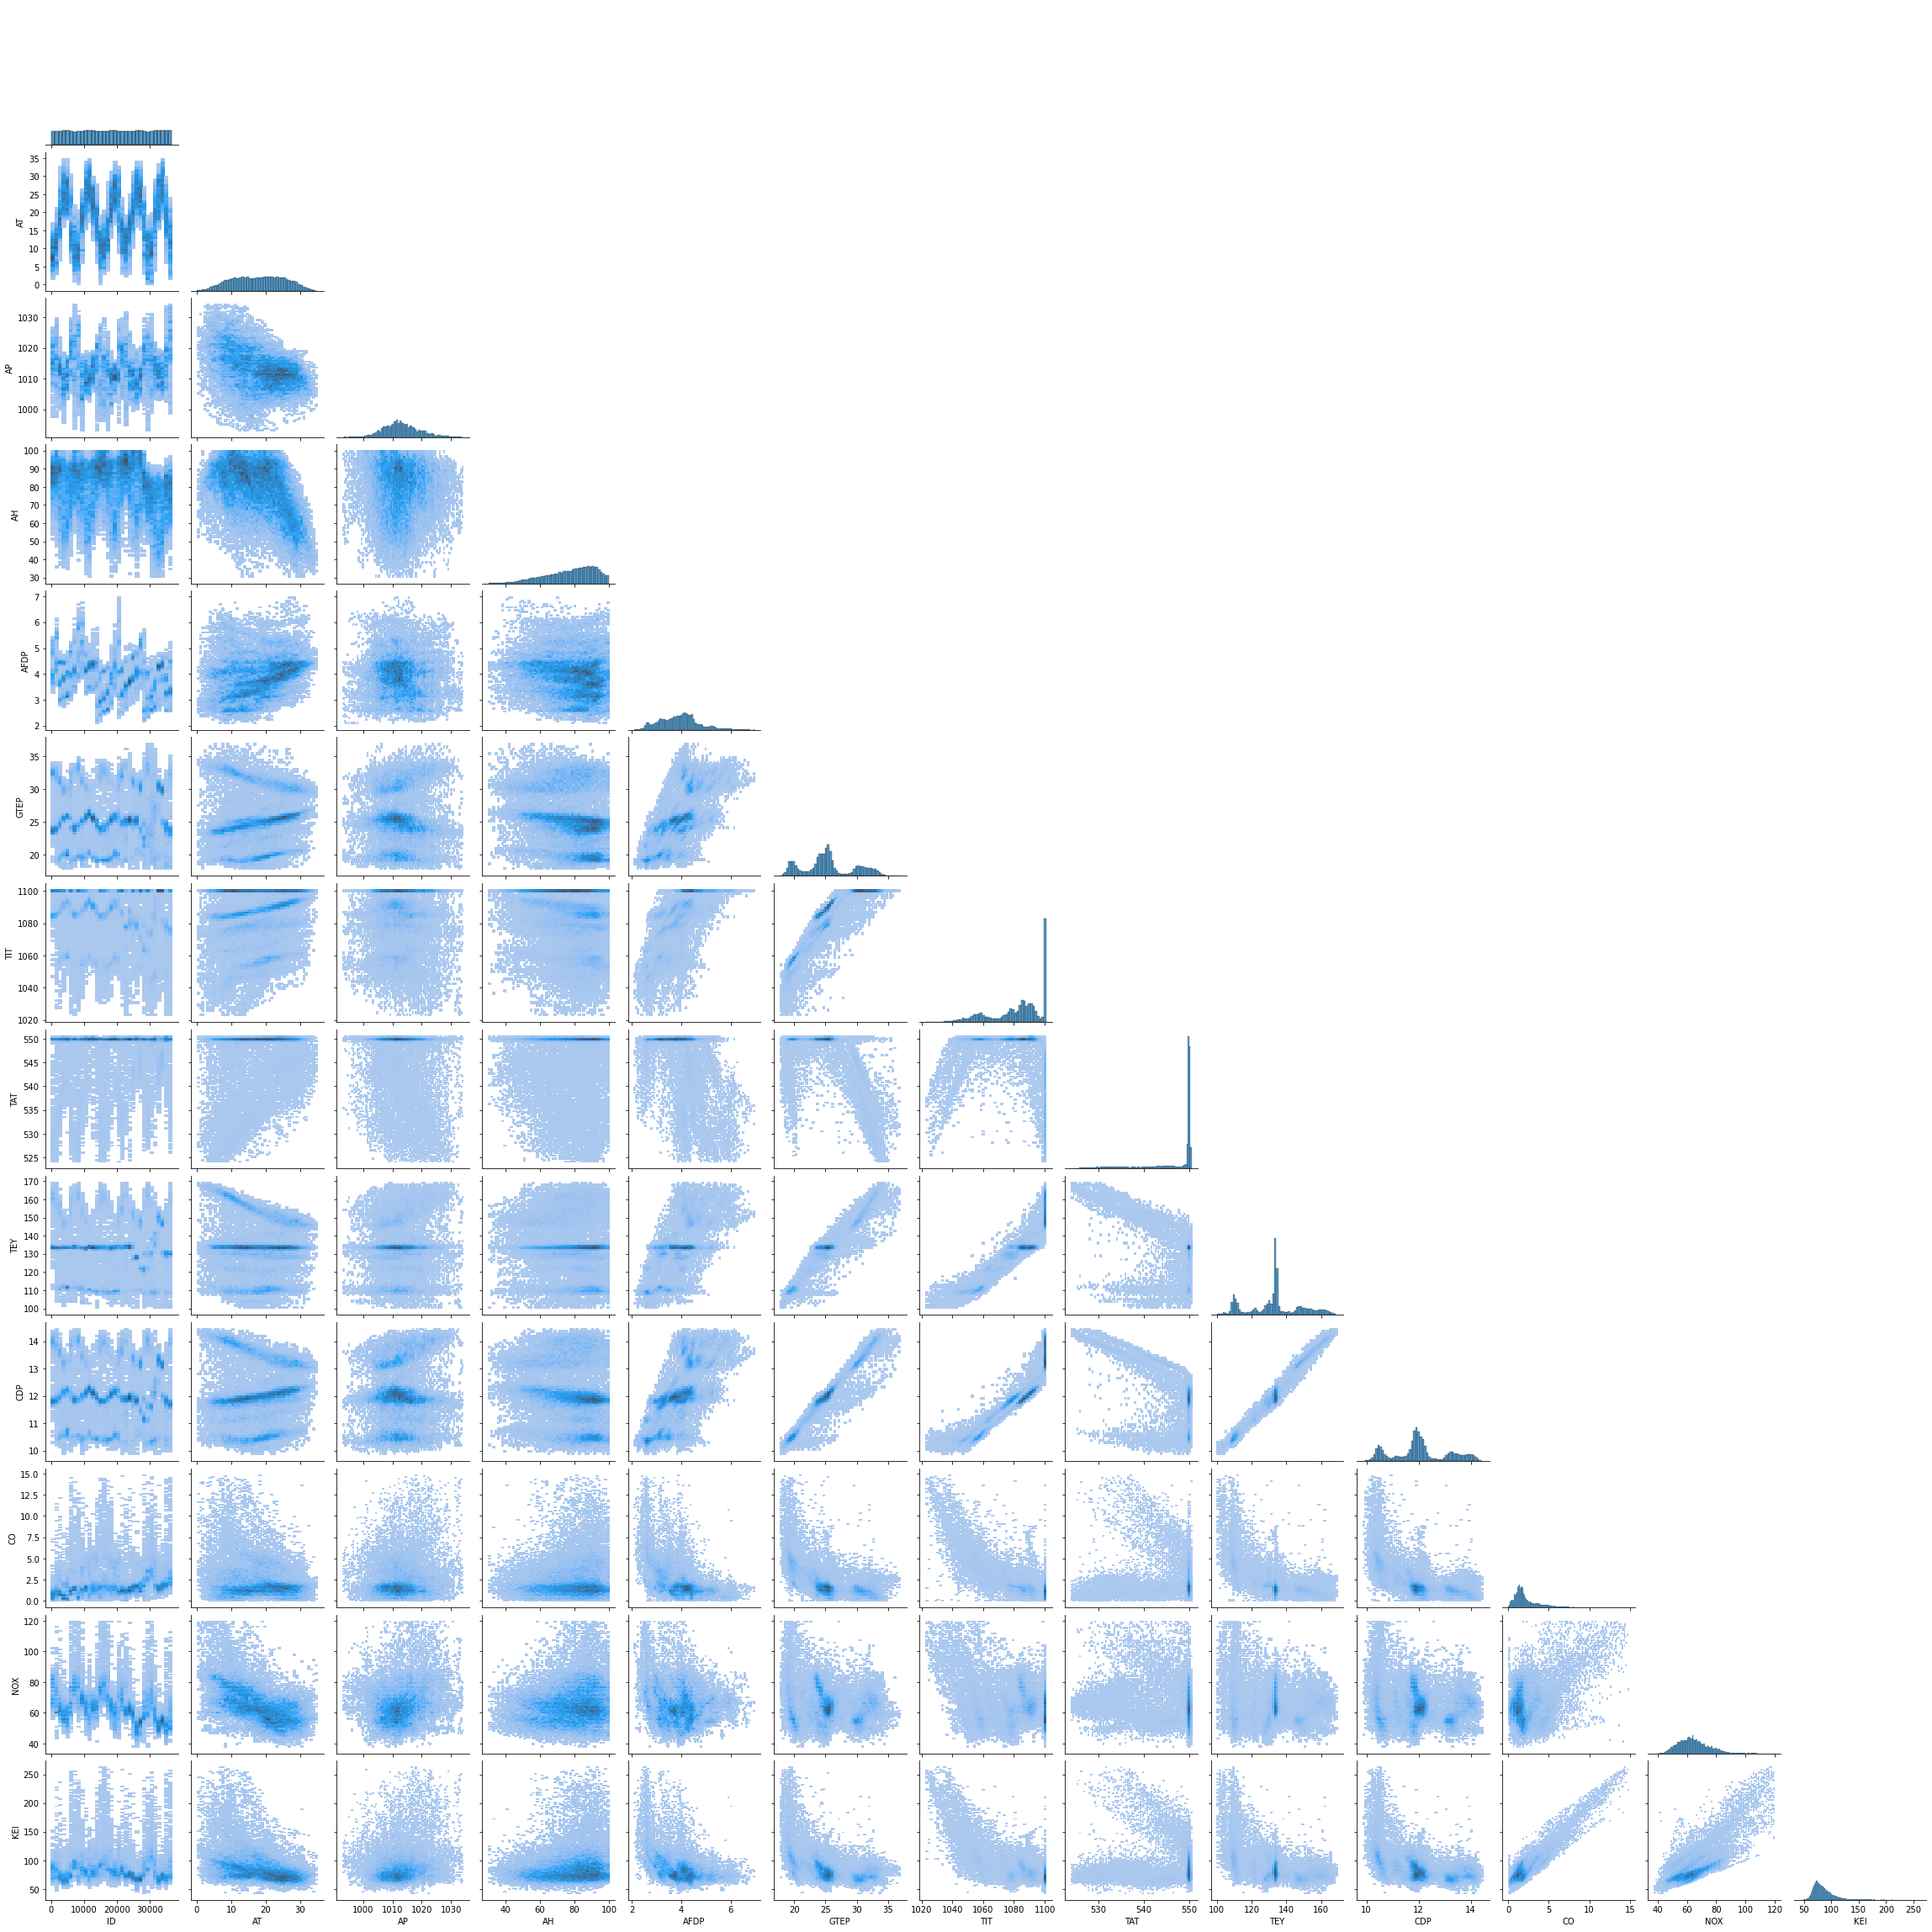

In [49]:
sns.pairplot(dfMain, corner=True, kind="hist")

In [50]:
dfMain.corr()

,ID,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,KEI
ID,1.000000,0.053592,0.038967,-0.175640,-0.254476,0.037608,-0.123253,0.134936,-0.044281,-0.031530,0.206253,-0.341953,-0.000007
AT,0.053592,1.000000,-0.408482,-0.483567,0.275159,0.068874,0.195099,0.257068,-0.071611,0.037962,-0.199207,-0.565773,-0.404023
AP,0.038967,-0.408482,1.000000,-0.003222,-0.052613,0.037027,-0.014327,-0.203338,0.100609,0.082198,0.078798,0.207027,0.152253
AH,-0.175640,-0.483567,-0.003222,1.000000,-0.158340,-0.236005,-0.224175,0.023150,-0.137769,-0.197534,0.124176,0.160057,0.164995
AFDP,-0.254476,0.275159,-0.052613,-0.158340,1.000000,0.679867,0.697982,-0.469314,0.665742,0.704255,-0.515085,-0.187137,-0.469423
GTEP,0.037608,0.068874,0.037027,-0.236005,0.679867,1.000000,0.880275,-0.701788,0.963983,0.978382,-0.589367,-0.196444,-0.529148
TIT,-0.123253,0.195099,-0.014327,-0.224175,0.697982,0.880275,1.000000,-0.400282,0.914626,0.914495,-0.771044,-0.196533,-0.664997
TAT,0.134936,0.257068,-0.203338,0.023150,-0.469314,-0.701788,-0.400282,1.000000,-0.687248,-0.709229,0.117229,-0.086547,0.048608
TEY,-0.044281,-0.071611,0.100609,-0.137769,0.665742,0.963983,0.914626,-0.687248,1.000000,0.988653,-0.639932,-0.105996,-0.526163
CDP,-0.031530,0.037962,0.082198,-0.197534,0.704255,0.978382,0.914495,-0.709229,0.988653,1.000000,-0.624999,-0.164544,-0.541399


#### Conclusion:
- It's immediate to see that TEY has a strong linear correlation with GTEP, TIT and CDP.
- A more focused analysis of KEI is required.

### Feature Identification for a Model to Estimate KEI

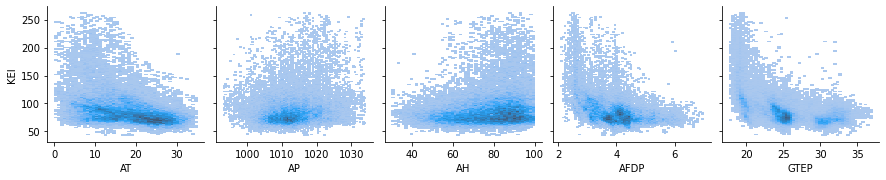

In [51]:
sns.pairplot(data=dfMain, y_vars=['KEI'], x_vars=features[0:5], kind="hist") # First five features

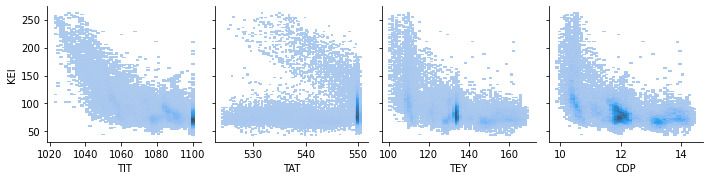

In [52]:
sns.pairplot(data=dfMain, y_vars=['KEI'], x_vars=features[5:], kind="hist") # Remaining features

In [53]:
dfMain.corr()['KEI'][features].sort_values()

TIT    -0.664997
CDP    -0.541399
GTEP   -0.529148
TEY    -0.526163
AFDP   -0.469423
AT     -0.404023
TAT     0.048608
AP      0.152253
AH      0.164995
Name: KEI, dtype: float64

#### Conclusion: By looking into the KEI correlation graph and value, against each feature, it's possible to notice that:
- As expected, ambient features have lower correlation to KEI when compared to process variables.
- The only ambient features that could play a role is AT.
- As predicted on the distribution analysis section, TAT has almost no variation, thus ends up being a weak feature to use in this dataset. Maybe a more sensitive sensor to collect a wider range of data would help to increase the relevancy of this feature.
- All the other process variables seem to have a somewhat similar correlation with KEI. They range on the 40% to 65% range and the shape is between a linear and a quadratic expression.

### GTEP x CDP Temporal Correlation Analysis

Text(0, 0.5, 'Normalized Value')

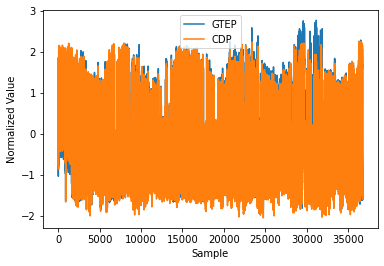

In [54]:
dfTemp = dfMain.copy()
dfTemp = dfTemp[['GTEP','CDP']]
dfTemp = (dfTemp-dfTemp.mean())/dfTemp.std() # Normalization to allow profile comparison
dfTemp.plot()
plt.xlabel('Sample')
plt.ylabel('Normalized Value')

Text(0, 0.5, 'Normalized Value')

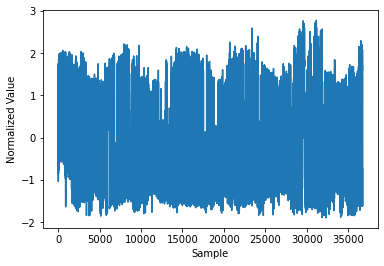

In [55]:
dfTemp['GTEP'].plot()
plt.xlabel('Sample')
plt.ylabel('Normalized Value')

Text(0, 0.5, 'Normalized Value')

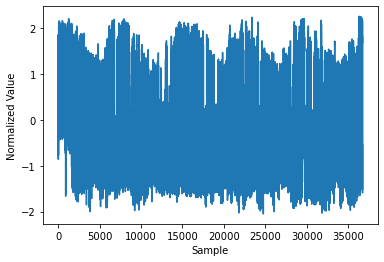

In [56]:
dfTemp['CDP'].plot()
plt.xlabel('Sample')
plt.ylabel('Normalized Value')

#### Conclusion:
- As suggested by the distribution analysis, being both pressure readings from the turbine exhausts, GTEP and CDP profiles match very closely.
- Indicates that only one of them should be enough to achieve a satisfactory result on modelling KEI.

### TIT x TAT Temporal Correlation Analysis

Text(0, 0.5, 'Normalized Value')

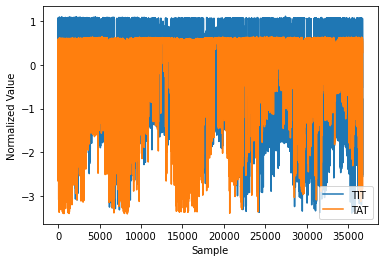

In [57]:
dfTemp = dfMain.copy()
dfTemp = dfTemp[['TIT','TAT']]
dfTemp = (dfTemp-dfTemp.mean())/dfTemp.std() # Normalization to allow profile comparison
dfTemp.plot()
plt.xlabel('Sample')
plt.ylabel('Normalized Value')

Text(0, 0.5, 'Normalized Value')

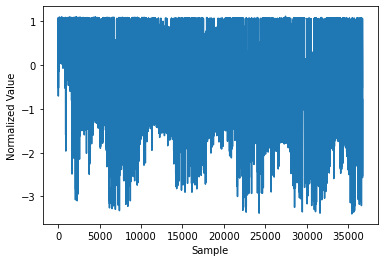

In [58]:
dfTemp['TIT'].plot()
plt.xlabel('Sample')
plt.ylabel('Normalized Value')

Text(0, 0.5, 'Normalized Value')

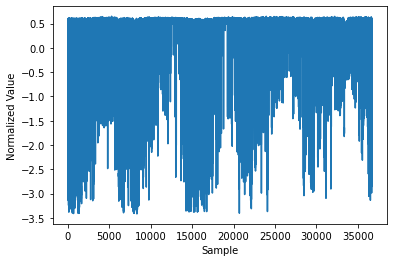

In [59]:
dfTemp['TAT'].plot()
plt.xlabel('Sample')
plt.ylabel('Normalized Value')

#### Conclusion:
- The distribution analysis, and the fact that both measurements are temperatures in different stages of the turbine, had suggested that TIT and TAT could have the very same temporal profile.
- But checking the comparison graphs above indicates that even though a similarity exists, the match of the profile is not as tight as imagined.

## Exploratory Data Analysis Conclusion:
### Baseline Model
- The baseline model to be used for this dataset shall be a linear model consisting of the main independent features identified in the dataset.
- Given the close relationship between TEY and TIT, only TIT will be used in the baseline, once it has the best correlation with KEI.
- Given the profile similarity between GTEP and CDP, only CDP will be used in the baseline, once it has the best correlation with KEI.
- Process variable have way better correlation than ambient weather data.
- So the features for the baseline model will be:
    - TIT
    - CDP
    - AFDP

### First Model
- As a first model, given the visual indication that the relationship may not be linear, a quadratic model seems to be a good fit to offer a noticeable improvement over the baseline.
- Regarding the model features, it also seems to be worth experimenting with adding features that were not used on the baseline, but that still possess good correlation:
    - GTEP
    - TEY
    - AT